# Problems 15.3, 15.6, 15.15, 15.16

# Problem 15.3

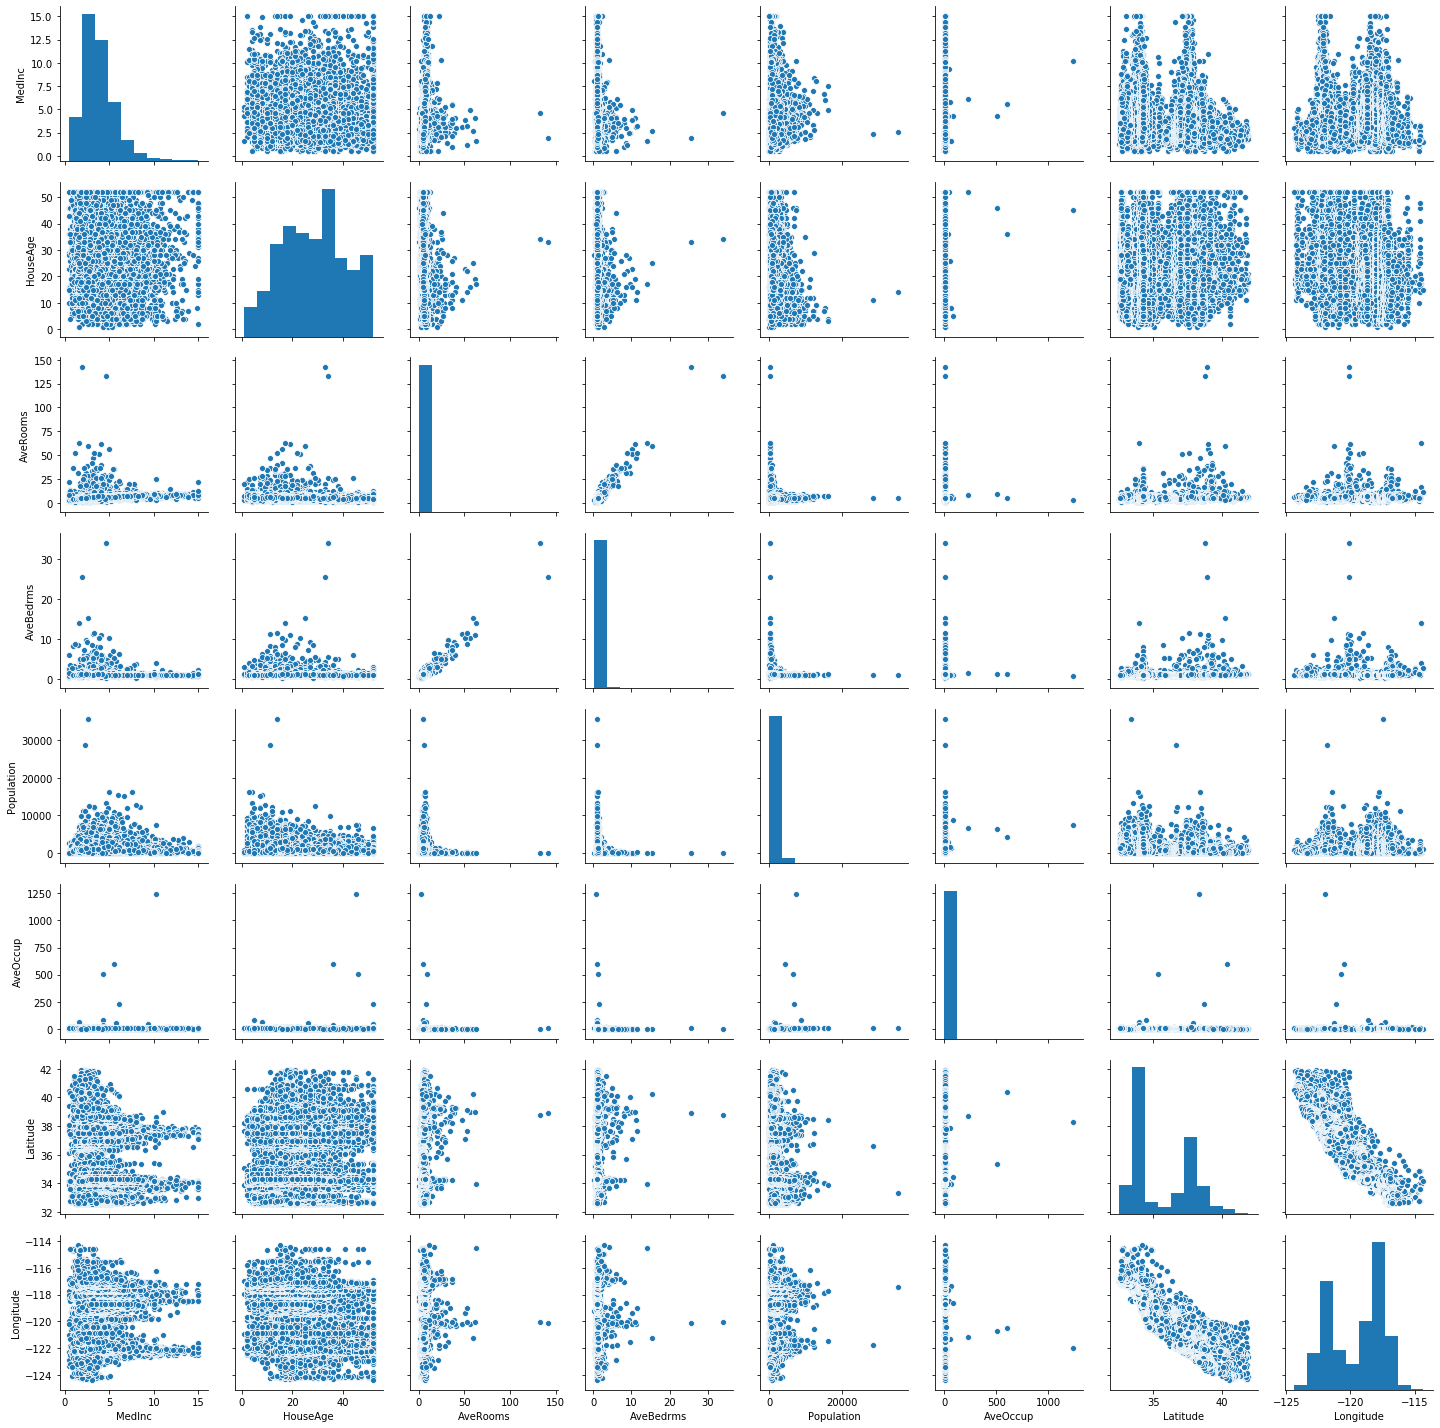

In [2]:
from sklearn.datasets import fetch_california_housing #pg 626, 628, 630
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
california = fetch_california_housing()
data = pd.DataFrame(california['data'],columns=california['feature_names'])
target = pd.DataFrame(california['target'])
grid = sns.pairplot(data=data,vars=data.columns) #page 648
grid
plt.show()

# Problem 15.6

In [ ]:
#Skip this problem due to errors with the ncdc NOAA website.

# Problem 15.15

OLS coefficients:
0    32.14567287589749
1    -242.8258201614843
2    559.9873821340648
3    407.64166456896027
4    -718.6870385676395
5    396.63010925137814
6    10.423047758440612
7    171.81177552712788
8    627.0797642583411
9    -21.624207114326325


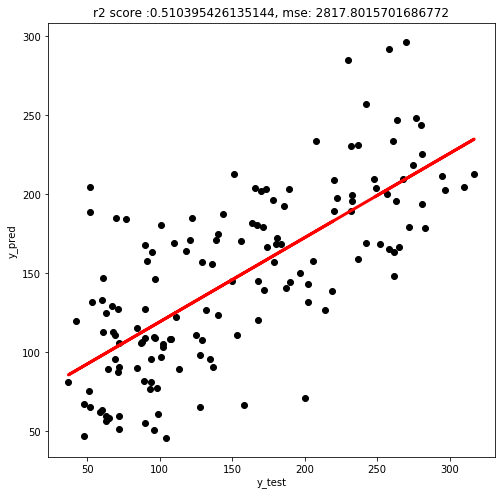

In [2]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from scipy import stats
X,y = load_diabetes(return_X_y=True)
data = pd.concat([pd.DataFrame(X),pd.Series(y)],axis=1)
data.columns = list(range(0,10))+['target']
n=1
#for feature in data.columns:
#    if n<=9:
#        plt.figure(figsize=(16,9))
#        plt.subplot(3,3,n)
#        sns.scatterplot(data=data,x=feature,y='target',hue='target',palette='cool',legend='brief')
#        n=n+1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

OLS = LinearRegression()
OLS.fit(X_train,y_train)
print('OLS coefficients:')
for index,i in enumerate(OLS.coef_):
    print(index,'  ',i)
y_pred = OLS.predict(X_test)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,y_pred)
line = slope*y_test+intercept
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred, color="black")
plt.plot(y_test,line,color='red',linewidth=3)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('r2 score :{}, mse: {}'.format(r2,mse))
plt.show()

# Problem  15.16

In [16]:
from sklearn.datasets import fetch_california_housing #pg 626, 628, 630
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
california = fetch_california_housing()
X = pd.DataFrame(california['data'],columns=california['feature_names'])
y = pd.DataFrame(california['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
L = {}
for c in X.columns:
    OLS = LinearRegression()
    X_train_p = np.array(X_train[c]).reshape(-1,1)
    X_test_p = np.array(X_test[c]).reshape(-1,1)
    OLS.fit(X_train_p,y_train)
    y_pred = OLS.predict(X_test_p)
    r2 = r2_score(y_test,y_pred)
    L[c]=r2

OLS = LinearRegression()
X_train_m = np.array(X_train)
X_test_m = np.array(X_test)
y_train_m = np.array(y_train)
OLS.fit(X_train_m,y_train)
y_pred_m = OLS.predict(X_test_m)
r2_m = r2_score(y_test,y_pred_m)
L['multi_regression'] = r2_m
L

{'MedInc': 0.4725720683367076,
 'HouseAge': 0.011069233426040048,
 'AveRooms': 0.023036337954520203,
 'AveBedrms': 0.0016564286182662036,
 'Population': 0.000607575231760471,
 'AveOccup': 0.0006782363549892034,
 'Latitude': 0.02316088573408348,
 'Longitude': 0.0011505926426811364,
 'multi_regression': 0.5970494128783952}

In [3]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------